In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [3]:
def list_directory_tree_with_os_walk(starting_directory):
    for root, directories, files in os.walk(starting_directory):
        print(f"Directory: {root}")
        for file in files:
            print(f"  File: {file}")

# Check the directory
starting_directory_noe = 'C:/Users/Noe/source/repos/Energy-forecasting-NTNU/data/'
starting_directory_hugo = 'C:/Users/hugob/OneDrive/Documents/ENSE3/3A/lectures/Machine Learning/Project/git/Energy-forecasting-NTNU/data'
os.chdir(starting_directory_hugo)
list_directory_tree_with_os_walk('.')

Directory: .
  File: .DS_Store
  File: Readme.md
  File: read_files.ipynb
  File: sample_submission.csv
  File: test.csv
Directory: .\.ipynb_checkpoints
  File: Data_exploration-checkpoint.ipynb
  File: Readme-checkpoint.md
  File: read_files-checkpoint.ipynb
Directory: .\A
  File: train_targets.parquet
  File: X_test_estimated.parquet
  File: X_train_estimated.parquet
  File: X_train_observed.parquet
Directory: .\B
  File: train_targets.parquet
  File: X_test_estimated.parquet
  File: X_train_estimated.parquet
  File: X_train_observed.parquet
Directory: .\C
  File: train_targets.parquet
  File: X_test_estimated.parquet
  File: X_train_estimated.parquet
  File: X_train_observed.parquet
Directory: .\Hugo
  File: read_files.ipynb
Directory: .\Noe
  File: Data_exploration.ipynb
  File: read_files.ipynb


In [4]:
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

In [5]:
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')


In [6]:
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')


In [7]:
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')

In [8]:
train_a

,time,pv_measurement
0,2019-06-02 22:00:00,0.00
1,2019-06-02 23:00:00,0.00
2,2019-06-03 00:00:00,0.00
3,2019-06-03 01:00:00,0.00
4,2019-06-03 02:00:00,19.36
...,...,...
34080,2023-04-30 19:00:00,9.02
34081,2023-04-30 20:00:00,0.00
34082,2023-04-30 21:00:00,0.00
34083,2023-04-30 22:00:00,0.00


In [9]:
X_train_observed_a

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.0,0.0,1744.900024,0.0,280.299988,0.0,0.0,0.0,0.0,98.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.799988,0.0,0.0,994.200012,1000.299988,0.0,0.0,73.099998,1006.299988,NaN,0.0,0.0,-0.0,0.1,342.834015,-3.202000,0.0,285.899994,100.0,39640.101562,3.7,-3.6,-0.8,-0.0
1,2019-06-02 22:15:00,7.7,1.229,1734.000000,0.0,0.0,1734.000000,0.0,280.299988,0.0,0.0,0.0,0.0,99.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.500000,0.0,0.0,993.900024,999.900024,0.0,0.0,72.199997,1006.000000,NaN,0.0,0.0,-0.0,0.2,346.294006,-3.650000,0.0,286.100006,100.0,40123.898438,3.6,-3.6,-0.6,-0.0
2,2019-06-02 22:30:00,7.7,1.228,1723.500000,0.0,0.0,1723.500000,0.0,280.299988,0.0,0.0,0.0,0.0,99.199997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.099976,0.0,0.0,993.599976,999.599976,0.0,0.0,71.199997,1005.599976,NaN,0.0,0.0,-0.0,0.2,349.768005,-3.998000,0.0,286.299988,100.0,40628.300781,3.6,-3.6,-0.4,-0.0
3,2019-06-02 22:45:00,7.7,1.226,1713.400024,0.0,0.0,1713.400024,0.0,280.299988,0.0,0.0,0.0,0.0,99.400002,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.799988,0.0,0.0,993.299988,999.299988,0.0,0.0,70.199997,1005.299988,NaN,0.0,0.0,-0.0,0.2,353.251007,-4.247000,0.0,286.600006,100.0,41153.601562,3.5,-3.5,-0.2,-0.0
4,2019-06-02 23:00:00,7.7,1.225,1703.599976,0.0,0.0,1703.599976,0.0,280.299988,0.0,0.0,0.0,0.0,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.500000,0.0,0.0,993.000000,999.000000,0.0,0.0,69.199997,1005.000000,NaN,0.0,0.0,-0.0,0.2,356.742004,-4.393000,0.0,286.799988,100.0,41699.898438,3.5,-3.5,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118664,2022-10-21 00:00:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,2.800000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.400024,0.0,0.0,1005.500000,1011.799988,0.0,0.0,82.699997,1018.099976,NaN,0.0,0.0,-0.0,0.0,16.612000,-36.306000,0.0,276.899994,2.8,25791.000000,1.3,-0.4,1.2,-0.0
118665,2022-10-21 00:15:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,2.300000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.299988,0.0,0.0,1005.400024,1011.700012,0.0,0.0,83.099998,1018.000000,NaN,0.0,0.0,-0.0,0.0,21.132999,-35.762001,0.0,276.799988,2.3,28560.599609,1.4,-0.6,1.2,-0.0
118666,2022-10-21 00:30:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,1.700000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.200012,0.0,0.0,1005.299988,1011.599976,0.0,0.0,83.400002,1017.900024,NaN,0.0,0.0,-0.0,0.0,25.594000,-35.095001,0.0,276.600006,1.7,31317.800781,1.4,-0.8,1.2,-0.0
118667,2022-10-21 00:45:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.600006,0.0,0.0,0.0,0.0,1.100000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.000000,0.0,0.0,1005.099976,1011.400024,0.0,0.0,83.800003,1017.700012,NaN,0.0,0.0,-0.0,0.0,29.988001,-34.311001,0.0,276.500000,1.1,34062.601562,1.5,-1.0,1.1,-0.0


In [10]:
X_train_observed_a.shape

(118669, 46)

In [13]:
X_train_observed_a.describe()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
count,118669.000000,118669.000000,96422.000000,1.186690e+05,118669.000000,110603.000000,118669.000000,118669.000000,118669.000000,1.186690e+05,118669.000000,1.186690e+05,118669.000000,118669.0,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,2724.0,118669.000000,118669.0,118669.000000,118669.000000,118669.000000,118669.000000,118669.00000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000,118669.000000
mean,6.652522,1.249078,2907.976318,5.993966e+05,166.499893,1737.146240,0.022398,276.822968,44.918148,1.617058e+05,56.611053,2.038007e+05,67.606621,6.0,0.053117,0.004418,0.106242,0.013277,0.026567,0.521391,0.511650,1009.614868,0.006302,0.091018,996.782776,1002.884888,0.187398,0.011913,74.231392,1008.970276,250.0,0.052763,0.0,0.000062,0.091565,179.629974,1.529540,0.05910,280.708527,74.403175,32446.886719,3.043209,0.756783,0.517437,0.000019
std,2.796409,0.036317,2570.401855,8.797980e+05,244.907578,1815.570679,0.190339,6.701851,64.780273,2.301814e+05,119.745392,4.248438e+05,33.857571,0.0,0.489839,0.075659,0.746422,0.181746,0.306437,0.499342,0.499748,12.484639,0.037381,0.379524,12.351003,12.404640,2.519959,0.047560,13.889423,12.460940,0.0,0.409022,0.0,0.001884,0.249243,103.778503,24.146574,0.10952,6.573745,33.518063,17967.917969,1.779309,2.856045,1.851810,0.001392
min,0.700000,1.145000,27.799999,0.000000e+00,0.000000,27.900000,-1.000000,250.899994,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,944.299988,0.000000,0.000000,932.299988,938.099976,0.000000,0.000000,22.700001,943.900024,250.0,0.000000,0.0,-0.000000,0.000000,0.002000,-50.004002,0.00000,258.899994,0.000000,154.300003,0.000000,-7.300000,-9.300000,-0.000000
25%,4.400000,1.224000,1102.900024,0.000000e+00,0.000000,590.700012,0.000000,272.100006,0.000000,0.000000e+00,0.000000,0.000000e+00,43.299999,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1002.099976,0.000000,0.000000,989.299988,995.299988,0.000000,0.000000,65.000000,1001.400024,250.0,0.000000,0.0,0.000000,0.000000,88.487999,-15.066000,0.00000,275.899994,54.799999,15592.400391,1.700000,-1.400000,-0.700000,0.000000
50%,6.300000,1.247000,1882.400024,3.574770e+04,8.600000,1162.599976,0.000000,277.200012,4.100000,2.481410e+04,0.000000,8.960000e+01,80.500000,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1010.700012,0.000000,0.000000,997.900024,1003.900024,0.000000,0.000000,76.699997,1010.000000,250.0,0.000000,0.0,0.000000,0.000000,179.436996,1.202000,0.00000,280.700012,93.699997,36359.800781,2.700000,0.400000,0.500000,0.000000
75%,8.600000,1.272000,3969.750000,1.037819e+06,288.799988,2079.600098,0.000000,282.000000,76.000000,2.743256e+05,41.799999,1.598314e+05,98.800003,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1018.299988,0.000000,0.000000,1005.400024,1011.500000,0.000000,0.000000,85.400002,1017.599976,250.0,0.000000,0.0,0.000000,0.100000,270.640991,18.995001,0.10000,285.200012,99.900002,48084.500000,4.1000

In [11]:
X_train_observed_a.columns

Index(['date_forecast', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
       'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm',
       'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
       'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
       'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
       'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_density:kgm3', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K',
       'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
       'wind_speed_u_10m:ms',

In [12]:
X_train_estimated_a

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.4,1.233,1425.099976,0.0,0.0,1211.699951,1.0,281.399994,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1001.099976,0.0,0.0,988.500000,994.500000,0.0,0.0,92.699997,1000.599976,NaN,0.0,0.0,-0.0,0.4,340.799011,-38.466999,0.0,284.700012,100.000000,29429.699219,0.8,-0.4,0.7,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.4,1.233,2085.899902,0.0,0.0,1560.500000,1.0,281.299988,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.799988,0.0,0.0,988.200012,994.200012,0.0,0.1,92.699997,1000.299988,NaN,0.0,0.0,-0.0,0.4,345.451996,-38.955002,0.0,284.700012,100.000000,23604.099609,0.7,-0.4,0.7,-0.0
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.3,1.233,2746.600098,0.0,0.0,1909.400024,1.0,281.200012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.400024,0.0,0.0,987.900024,993.900024,0.0,0.1,92.699997,1000.000000,NaN,0.0,0.0,-0.0,0.5,350.153015,-39.310001,0.0,284.700012,100.000000,17799.800781,0.7,-0.3,0.6,-0.0
3,2022-10-27 07:00:18,2022-10-28 22:45:00,8.3,1.233,3407.399902,0.0,0.0,2258.199951,1.0,281.200012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.099976,0.0,0.0,987.599976,993.599976,0.0,0.1,92.599998,999.700012,NaN,0.0,0.0,-0.0,0.6,354.886993,-39.528999,0.0,284.600006,100.000000,12016.500000,0.6,-0.2,0.6,-0.0
4,2022-10-27 07:00:18,2022-10-28 23:00:00,8.2,1.233,4068.199951,0.0,0.0,2607.000000,1.0,281.100006,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.799988,0.0,0.0,987.299988,993.299988,0.0,0.1,92.599998,999.299988,NaN,0.0,0.0,-0.0,0.6,359.638000,-39.609001,0.0,284.600006,100.000000,6254.399902,0.6,-0.1,0.6,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17571,2023-04-29 07:00:05,2023-04-30 22:45:00,4.5,1.281,1173.900024,0.0,0.0,536.500000,0.0,272.299988,0.0,0.0,0.0,0.0,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.299988,0.0,0.0,1001.099976,1007.400024,0.0,0.0,79.599998,1013.700012,NaN,0.0,0.0,-0.0,0.1,352.920013,-11.731000,0.1,274.200012,99.900002,11629.299805,3.9,2.9,2.5,-0.0
17572,2023-04-29 07:00:05,2023-04-30 23:00:00,4.5,1.281,1054.199951,0.0,0.0,542.400024,0.0,272.200012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.299988,0.0,0.0,1001.099976,1007.299988,0.0,0.0,80.000000,1013.599976,NaN,0.0,0.0,-0.0,0.1,356.634003,-11.884000,0.1,274.200012,100.000000,9923.200195,3.7,2.8,2.4,-0.0
17573,2023-04-29 07:00:05,2023-04-30 23:15:00,4.5,1.281,1435.800049,0.0,0.0,531.799988,0.0,272.299988,0.0,0.0,0.0,0.0,99.400002,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.099976,0.0,0.0,1000.900024,1007.200012,0.0,0.0,79.900002,1013.500000,NaN,0.0,0.0,-0.0,0.1,0.352000,-11.928000,0.1,274.200012,99.900002,11230.799805,3.7,2.7,2.5,-0.0
17574,2023-04-29 07:00:05,2023-04-30 23:30:00,4.5,1.281,1817.400024,0.0,0.0,521.200012,0.0,272.299988,0.0,0.0,0.0,0.0,98.099998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.000000,0.0,0.0,1000.799988,1007.000000,0.0,0.0,79.800003,1013.299988,NaN,0.0,0.0,-0.0,0.0,4.070000,-11.864000,0.1,274.200012,99.599998,12526.099609,3.8,2.7,2.6,-0.0


<AxesSubplot:title={'center':'Train/Test  C'}, xlabel='date_forecast'>

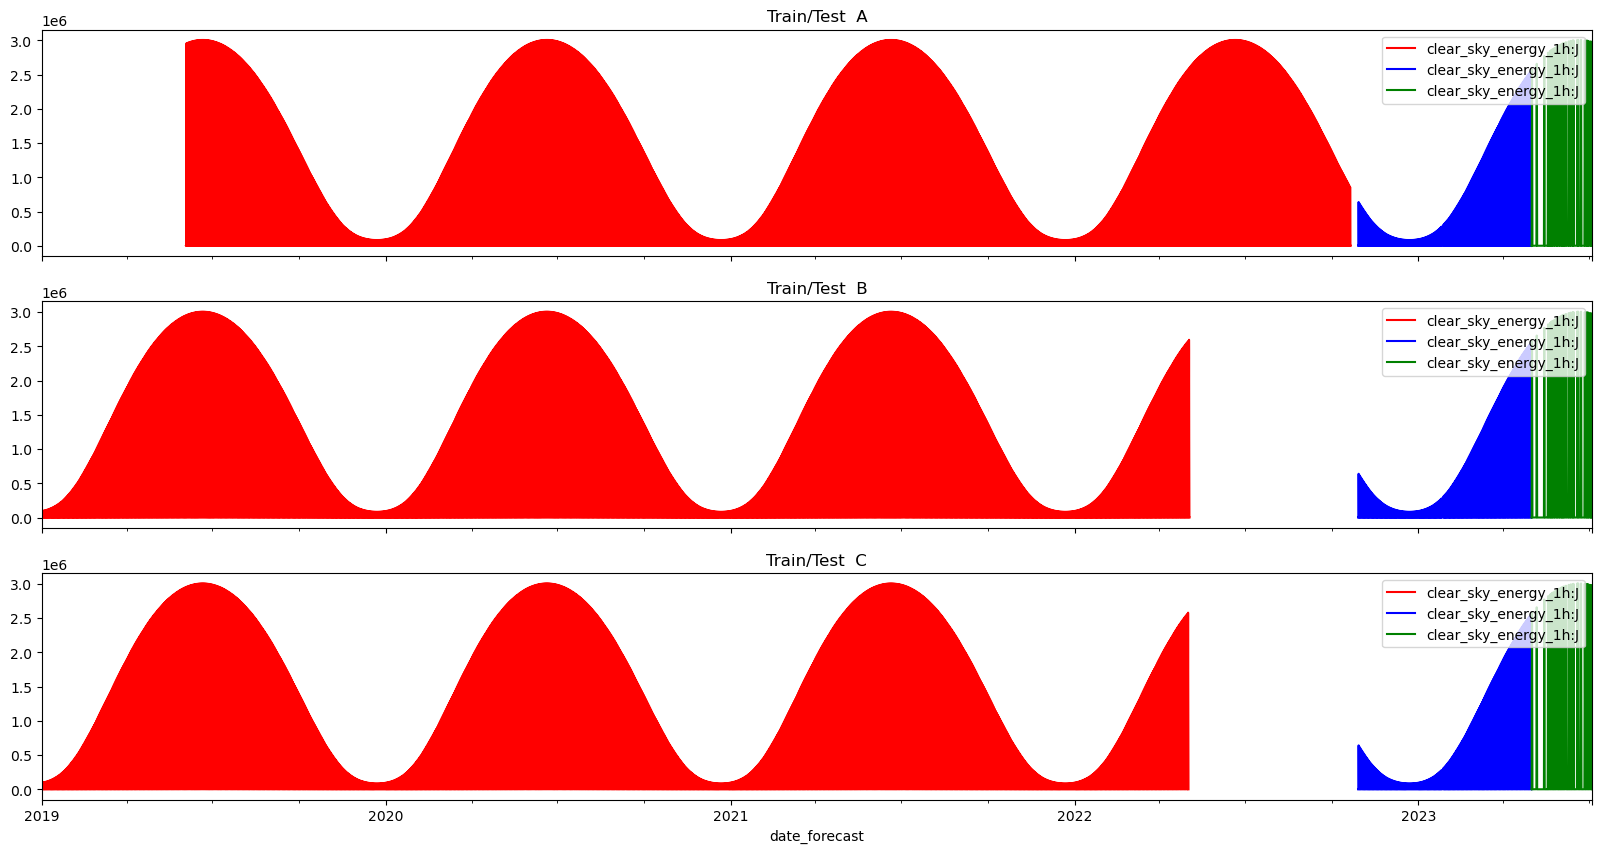

In [13]:
# Plotting a single feature
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = 'clear_sky_energy_1h:J'
X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')

In [14]:
test = pd.read_csv('test.csv')
test

,id,time,prediction,location
0,0,2023-05-01 00:00:00,0,A
1,1,2023-05-01 01:00:00,0,A
2,2,2023-05-01 02:00:00,0,A
3,3,2023-05-01 03:00:00,0,A
4,4,2023-05-01 04:00:00,0,A
...,...,...,...,...
2155,2155,2023-07-03 19:00:00,0,C
2156,2156,2023-07-03 20:00:00,0,C
2157,2157,2023-07-03 21:00:00,0,C
2158,2158,2023-07-03 22:00:00,0,C


In [13]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,id,prediction
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
2155,2155,0
2156,2156,0
2157,2157,0
2158,2158,0


In [14]:
# Example, let the predictions be random values
test['prediction'] = np.random.rand(len(test))
sample_submission = sample_submission[['id']].merge(test[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv('my_first_submission.csv', index=False)

In [15]:
test

,id,time,prediction,location
0,0,2023-05-01 00:00:00,0.089413,A
1,1,2023-05-01 01:00:00,0.954587,A
2,2,2023-05-01 02:00:00,0.114699,A
3,3,2023-05-01 03:00:00,0.166723,A
4,4,2023-05-01 04:00:00,0.383829,A
...,...,...,...,...
2155,2155,2023-07-03 19:00:00,0.610515,C
2156,2156,2023-07-03 20:00:00,0.267965,C
2157,2157,2023-07-03 21:00:00,0.576212,C
2158,2158,2023-07-03 22:00:00,0.903816,C


### Fill the blank and Nan 

In [16]:
X_train_observed_a.isna().sum() 

date_forecast                          0
absolute_humidity_2m:gm3               0
air_density_2m:kgm3                    0
ceiling_height_agl:m               22247
clear_sky_energy_1h:J                  0
clear_sky_rad:W                        0
cloud_base_agl:m                    8066
dew_or_rime:idx                        0
dew_point_2m:K                         0
diffuse_rad:W                          0
diffuse_rad_1h:J                       0
direct_rad:W                           0
direct_rad_1h:J                        0
effective_cloud_cover:p                0
elevation:m                            0
fresh_snow_12h:cm                      0
fresh_snow_1h:cm                       0
fresh_snow_24h:cm                      0
fresh_snow_3h:cm                       0
fresh_snow_6h:cm                       0
is_day:idx                             0
is_in_shadow:idx                       0
msl_pressure:hPa                       0
precip_5min:mm                         0
precip_type_5min

In [17]:
X_train_observed_b.isna().sum()

date_forecast                          0
absolute_humidity_2m:gm3               0
air_density_2m:kgm3                    0
ceiling_height_agl:m               18772
clear_sky_energy_1h:J                  0
clear_sky_rad:W                        0
cloud_base_agl:m                    7473
dew_or_rime:idx                        0
dew_point_2m:K                         0
diffuse_rad:W                          0
diffuse_rad_1h:J                       0
direct_rad:W                           0
direct_rad_1h:J                        0
effective_cloud_cover:p                0
elevation:m                            0
fresh_snow_12h:cm                      0
fresh_snow_1h:cm                       0
fresh_snow_24h:cm                      0
fresh_snow_3h:cm                       0
fresh_snow_6h:cm                       0
is_day:idx                             0
is_in_shadow:idx                       0
msl_pressure:hPa                       0
precip_5min:mm                         0
precip_type_5min

In [18]:
X_train_observed_c.isna().sum()

date_forecast                          0
absolute_humidity_2m:gm3               0
air_density_2m:kgm3                    0
ceiling_height_agl:m               19923
clear_sky_energy_1h:J                  0
clear_sky_rad:W                        0
cloud_base_agl:m                    8512
dew_or_rime:idx                        0
dew_point_2m:K                         0
diffuse_rad:W                          0
diffuse_rad_1h:J                       0
direct_rad:W                           0
direct_rad_1h:J                        0
effective_cloud_cover:p                0
elevation:m                            0
fresh_snow_12h:cm                      0
fresh_snow_1h:cm                       0
fresh_snow_24h:cm                      0
fresh_snow_3h:cm                       0
fresh_snow_6h:cm                       0
is_day:idx                             0
is_in_shadow:idx                       0
msl_pressure:hPa                       0
precip_5min:mm                         0
precip_type_5min

In [19]:
#Snow_density => too many missing values => Delete this feature
#

X_train_observed_a = X_train_observed_a.drop(columns = 'snow_density:kgm3')
X_train_observed_b = X_train_observed_b.drop(columns = 'snow_density:kgm3')
X_train_observed_c = X_train_observed_c.drop(columns = 'snow_density:kgm3')

X_train_estimated_a = X_train_estimated_a.drop(columns = 'snow_density:kgm3')
X_train_estimated_b = X_train_estimated_b.drop(columns = 'snow_density:kgm3')
X_train_estimated_c = X_train_estimated_c.drop(columns = 'snow_density:kgm3')

X_test_estimated_a = X_test_estimated_a.drop(columns = 'snow_density:kgm3')
X_test_estimated_b = X_test_estimated_b.drop(columns = 'snow_density:kgm3')
X_test_estimated_c = X_test_estimated_c.drop(columns = 'snow_density:kgm3')
    

In [20]:
X_train_observed_a.shape

(118669, 45)

In [21]:
# Imput missing values fill with last valid observation
def fill_nan(Dataframe, feature):
    it_na = np.where(Dataframe[feature].isna())[0]
    
    #If missing value
    if len(it_na != 0):
        #print("Missing data size =",it_na.size," out of", Dataframe.shape[0])
        new_column = Dataframe[feature].fillna(method='ffill')
        method = 'ffill'
        
        if((np.any(new_column.isna()) == True)): 
            method = 'bfill'
            new_column = Dataframe[feature].fillna(method='bfill')
           
        #plt.plot(new_column)
        #plt.scatter(it_na,new_column[it_na],s=10, c='red')
    
        if (np.any(new_column.isna()) == False):
            print("Filled with",method,"method")
            Dataframe[feature] = new_column
        else:
            print("Still Nan values")

In [22]:
nan_feature = ['ceiling_height_agl:m', 'cloud_base_agl:m']

fill_nan(X_train_observed_a, nan_feature[0]), fill_nan(X_train_observed_a, nan_feature[1])
fill_nan(X_train_observed_b, nan_feature[0]), fill_nan(X_train_observed_b, nan_feature[1])
fill_nan(X_train_observed_c, nan_feature[0]), fill_nan(X_train_observed_c, nan_feature[1])

fill_nan(X_train_estimated_a, nan_feature[0]), fill_nan(X_train_estimated_a, nan_feature[1])
fill_nan(X_train_estimated_b, nan_feature[0]), fill_nan(X_train_estimated_b, nan_feature[1])
fill_nan(X_train_estimated_c, nan_feature[0]), fill_nan(X_train_estimated_c, nan_feature[1])

fill_nan(X_test_estimated_a, nan_feature[0]), fill_nan(X_test_estimated_a, nan_feature[1])
fill_nan(X_test_estimated_b, nan_feature[0]), fill_nan(X_test_estimated_b, nan_feature[1])
fill_nan(X_test_estimated_c, nan_feature[0]), fill_nan(X_test_estimated_c, nan_feature[1])


Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with ffill method
Filled with bfill method
Filled with ffill method


(None, None)

In [23]:
print(np.any(X_train_observed_a.isna()), np.any(X_train_observed_b.isna()), np.any(X_train_observed_c.isna()),
    np.any(X_train_estimated_a.isna()), np.any(X_train_estimated_b.isna()), np.any(X_train_estimated_c.isna()),
    np.any(X_test_estimated_a.isna()), np.any(X_test_estimated_b.isna()), np.any(X_test_estimated_c.isna())
    )

False False False False False False False False False


### Check correlation between variable

<AxesSubplot:>

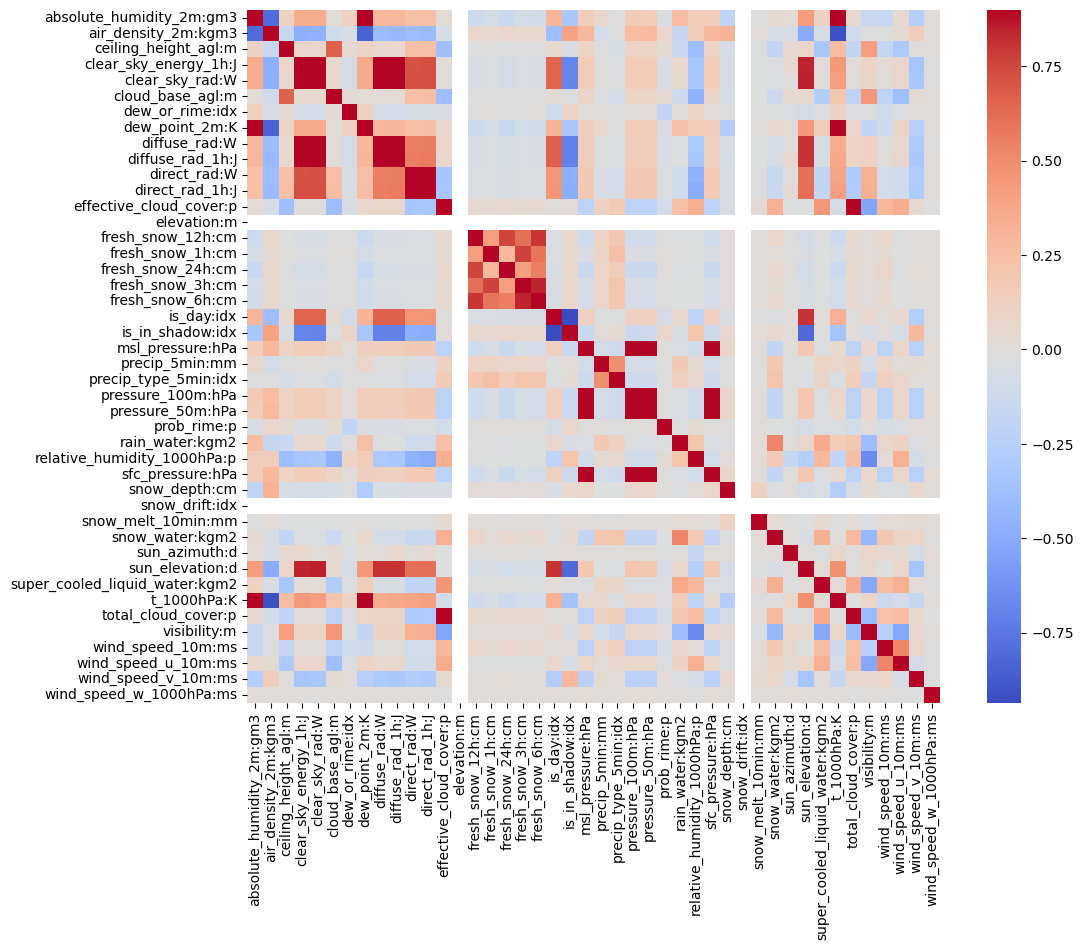

In [24]:
corr_matrix = X_train_observed_a.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=0.9, square=True,cmap='coolwarm',fmt='.2f')

In [31]:
corr_matrix.style.background_gradient(cmap='coolwarm')

c:\Users\hugob\anaconda3\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\hugob\anaconda3\lib\site-packages\pandas\io\formats\style.py:3556: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
absolute_humidity_2m:gm3,1.000000,-0.690102,-0.019200,0.102485,0.097802,-0.106869,0.193974,0.982592,0.074830,0.080729,0.019649,0.022738,0.238624,nan,-0.127256,-0.083282,-0.166690,-0.095418,-0.106228,0.091862,-0.099436,0.108173,0.176984,0.071394,0.120442,0.113266,0.003416,0.254522,0.246827,0.106184,-0.171660,nan,0.010174,0.206981,0.032640,0.113055,0.297441,0.878075,0.240667,-0.188444,0.111328,0.210022,-0.013165,nan
air_density_2m:kgm3,-0.690102,1.000000,-0.070352,-0.245232,-0.231391,0.072898,-0.064271,-0.727686,-0.229981,-0.244088,-0.158725,-0.172310,-0.326939,nan,0.004857,0.005847,0.042675,0.003409,0.001027,-0.216830,0.220163,0.477907,-0.132591,-0.078725,0.467799,0.475168,0.033831,-0.165054,0.046587,0.482417,0.043254,nan,-0.105856,-0.242391,-0.059026,-0.222312,-0.131118,-0.818526,-0.313371,-0.015075,-0.277502,-0.067851,-0.036435,nan
ceiling_height_agl:m,-0.019200,-0.070352,1.000000,0.006657,0.000788,0.558450,-0.003264,0.008792,-0.001206,0.003857,0.102238,0.107812,-0.316146,nan,-0.095314,-0.066840,-0.097350,-0.083708,-0.090460,0.021779,-0.020414,0.032125,-0.118169,-0.106624,0.035139,0.034187,0.034234,-0.092985,-0.318229,0.033248,-0.005527,nan,0.016493,-0.196472,0.037635,0.019978,-0.311216,0.175432,-0.148259,0.446560,-0.034847,-0.282335,0.058238,nan
clear_sky_energy_1h:J,0.102485,-0.245232,0.006657,1.000000,0.990549,0.001235,-0.018737,0.115195,0.904585,0.917539,0.756767,0.763401,-0.077058,nan,-0.064476,-0.067529,-0.063178,-0.076765,-0.073392,0.621940,-0.676899,0.127009,-0.039672,-0.027015,0.125286,0.122781,-0.053016,-0.048436,-0.337346,0.120320,-0.045123,nan,0.061022,0.012643,0.037737,0.714865,-0.041572,0.189169,-0.095633,0.002708,0.035973,0.007870,-0.253380,nan
clear_sky_rad:W,0.097802,-0.231391,0.000788,0.990549,1.000000,-0.003480,-0.018866,0.110050,0.913957,0.909655,0.761263,0.753342,-0.073295,nan,-0.061086,-0.065467,-0.062670,-0.072913,-0.068120,0.623729,-0.683576,0.127647,-0.037299,-0.024786,0.125653,0.123286,-0.052023,-0.050085,-0.315803,0.120959,-0.045347,nan,0.055290,0.013583,0.001462,0.717627,-0.037455,0.172211,-0.091906,-0.006493,0.028355,0.007275,-0.242548,nan
cloud_base_agl:m,-0.106869,0.072898,0.558450,0.001235,-0.003480,1.000000,0.010899,-0.097150,-0.020672,-0.016564,0.089585,0.096491,-0.204978,nan,-0.100536,-0.067507,-0.090513,-0.083179,-0.091466,0.002202,-0.000182,0.068761,-0.084194,-0.089195,0.069541,0.069843,0.046106,-0.039270,-0.265633,0.070175,-0.024250,nan,-0.019795,-0.110923,0.022161,0.024339,-0.175138,0.034141,-0.053302,0.287924,-0.165107,-0.248316,-0.020394,nan
dew_or_rime:idx,0.193974,-0.064271,-0.003264,-0.018737,-0.018866,0.010899,1.000000,0.159645,-0.021295,-0.021045,-0.013563,-0.013549,0.027175,nan,-0.026606,-0.017027,-0.041927,-0.012841,-0.016644,-0.031881,0.030764,0.081937,0.071045,0.019430,0.084382,0.083352,-0.370826,0.115722,0.019889,0.082343,-0.073356,nan,-0.004573,0.029442,-0.008786,-0.026389,0.034786,0.149769,0.031921,-0.037225,-0.035064,0.003591,-0.005142,nan
dew_point_2m:K,0.982592,-0.727686,0.008792,0.115195,0.110050,-0.097150,0.159645,1.000000,0.088549,0.095201,0.020671,0.024153,0.248549,nan,-0.094962,-0.064567,-0.135185,-0.071847,-0.078769,0.095134,-0.103404,0.095231,0.158322,0.074805,0.107864,0.100367,0.016285,0.209522,0.2078

In [26]:
threshold = 0.9
idx = np.where((np.abs(corr_matrix) > threshold) & (corr_matrix !=1))
print(round(idx[0].shape[0]/2)," strong correlation ==> \n")
columns_corr = []
ind_double = []

for i in range(idx[0].shape[0]):
    if ( ind_double.count((idx[0][i],idx[1][i])) == 0):
        ind_double.append((idx[1][i],idx[0][i]))
        print( 
        "Correlation between : ", 
        X_train_observed_a.columns[idx[0][i]+1], "and", 
        X_train_observed_a.columns[idx[1][i]+1], " = ",
        corr_matrix.iloc[idx[0][i], idx[1][i]], "\n"
        )
        columns_corr.append((X_train_observed_a.columns[idx[0][i]+1],X_train_observed_a.columns[idx[1][i]+1]))

10  strong correlation ==> 

Correlation between :  absolute_humidity_2m:gm3 and dew_point_2m:K  =  0.9748628282981654 

Correlation between :  clear_sky_energy_1h:J and clear_sky_rad:W  =  0.9923317834232241 

Correlation between :  diffuse_rad:W and diffuse_rad_1h:J  =  0.9869871153005173 

Correlation between :  direct_rad:W and direct_rad_1h:J  =  0.9852611696388884 

Correlation between :  msl_pressure:hPa and pressure_100m:hPa  =  0.9997717603345274 

Correlation between :  msl_pressure:hPa and pressure_50m:hPa  =  0.999914482392545 

Correlation between :  msl_pressure:hPa and sfc_pressure:hPa  =  0.9999042081912317 

Correlation between :  pressure_100m:hPa and pressure_50m:hPa  =  0.9999178389342016 

Correlation between :  pressure_100m:hPa and sfc_pressure:hPa  =  0.9996884691072808 

Correlation between :  pressure_50m:hPa and sfc_pressure:hPa  =  0.9999182187872183 



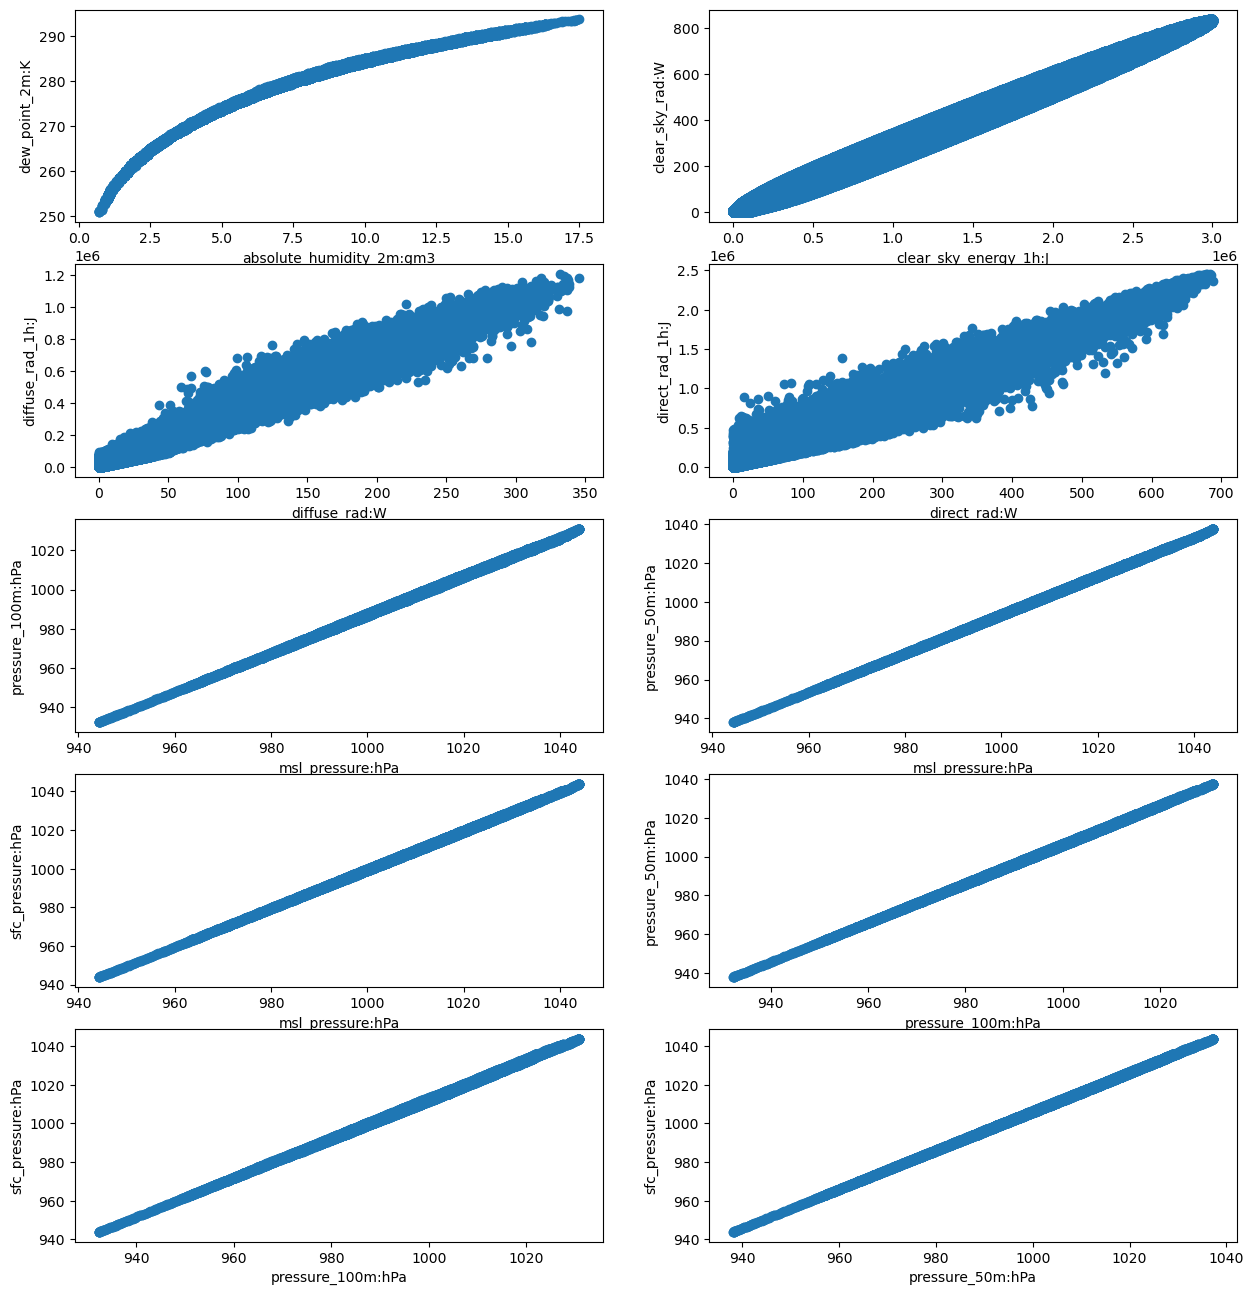

In [27]:
fig, axs = plt.subplots(5,2, figsize=(15,16))
k = 0
for i in range(5):
    for j in range(2):
        axs[i,j].scatter(X_train_observed_a.loc[:,columns_corr[k][0]],X_train_observed_a.loc[:,columns_corr[k][1]])
        axs[i,j].set_xlabel(columns_corr[k][0])
        axs[i,j].set_ylabel(columns_corr[k][1])
        k+=1

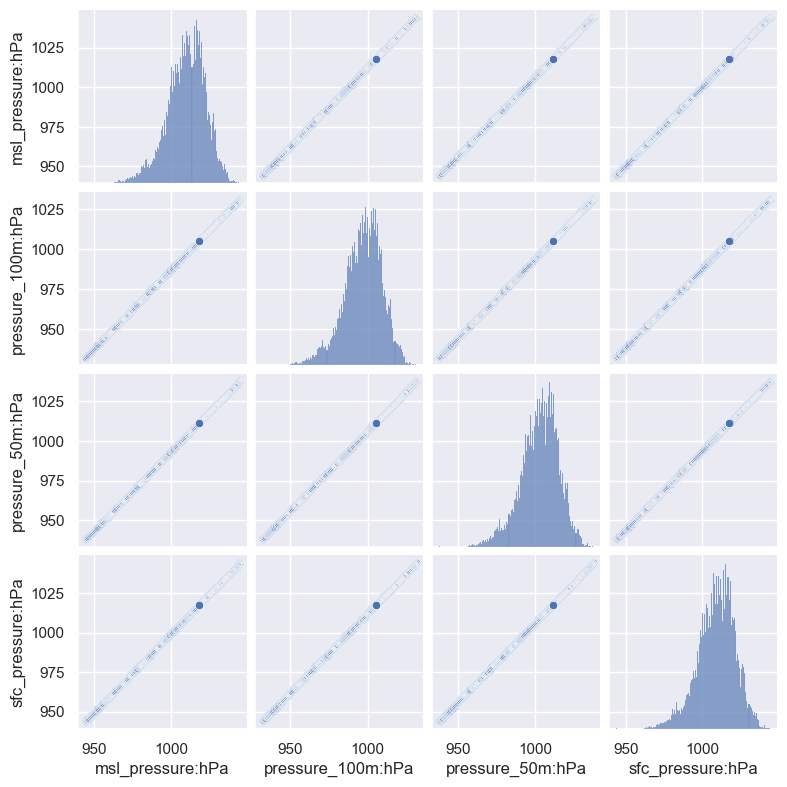

In [28]:
sns.set()
cols_pressure = ['msl_pressure:hPa', 'pressure_100m:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa']
sns.pairplot(X_train_observed_a[cols_pressure], height = 2)

In [29]:
#Check if it's the same for estimated dataset

corr_matrix = X_train_estimated_a.corr()
idx = np.where((np.abs(corr_matrix) > 0.95) & (corr_matrix !=1))
print(round(idx[0].shape[0]/2)," strong correlation ==> \n")
columns_corr = []
ind_double = []

for i in range(idx[0].shape[0]):
    if ( ind_double.count((idx[0][i],idx[1][i])) == 0):
        ind_double.append((idx[1][i],idx[0][i]))
        print( 
        "Correlation between : ", 
        X_train_estimated_a.columns[idx[0][i]+2], "and", 
        X_train_estimated_a.columns[idx[1][i]+2], " = ",
        corr_matrix.iloc[idx[0][i], idx[1][i]], "\n"
        )
        columns_corr.append((X_train_estimated_a.columns[idx[0][i]+2],X_train_estimated_a.columns[idx[1][i]+2]))

11  strong correlation ==> 

Correlation between :  absolute_humidity_2m:gm3 and dew_point_2m:K  =  0.9825923925578672 

Correlation between :  clear_sky_energy_1h:J and clear_sky_rad:W  =  0.9905489999326903 

Correlation between :  diffuse_rad:W and diffuse_rad_1h:J  =  0.9866227765332353 

Correlation between :  direct_rad:W and direct_rad_1h:J  =  0.9875649117141303 

Correlation between :  effective_cloud_cover:p and total_cloud_cover:p  =  0.9516523750949986 

Correlation between :  msl_pressure:hPa and pressure_100m:hPa  =  0.9998758721314741 

Correlation between :  msl_pressure:hPa and pressure_50m:hPa  =  0.9999438546226465 

Correlation between :  msl_pressure:hPa and sfc_pressure:hPa  =  0.9999413147545335 

Correlation between :  pressure_100m:hPa and pressure_50m:hPa  =  0.9999607448099789 

Correlation between :  pressure_100m:hPa and sfc_pressure:hPa  =  0.9998568597141421 

Correlation between :  pressure_50m:hPa and sfc_pressure:hPa  =  0.9999616602250426 



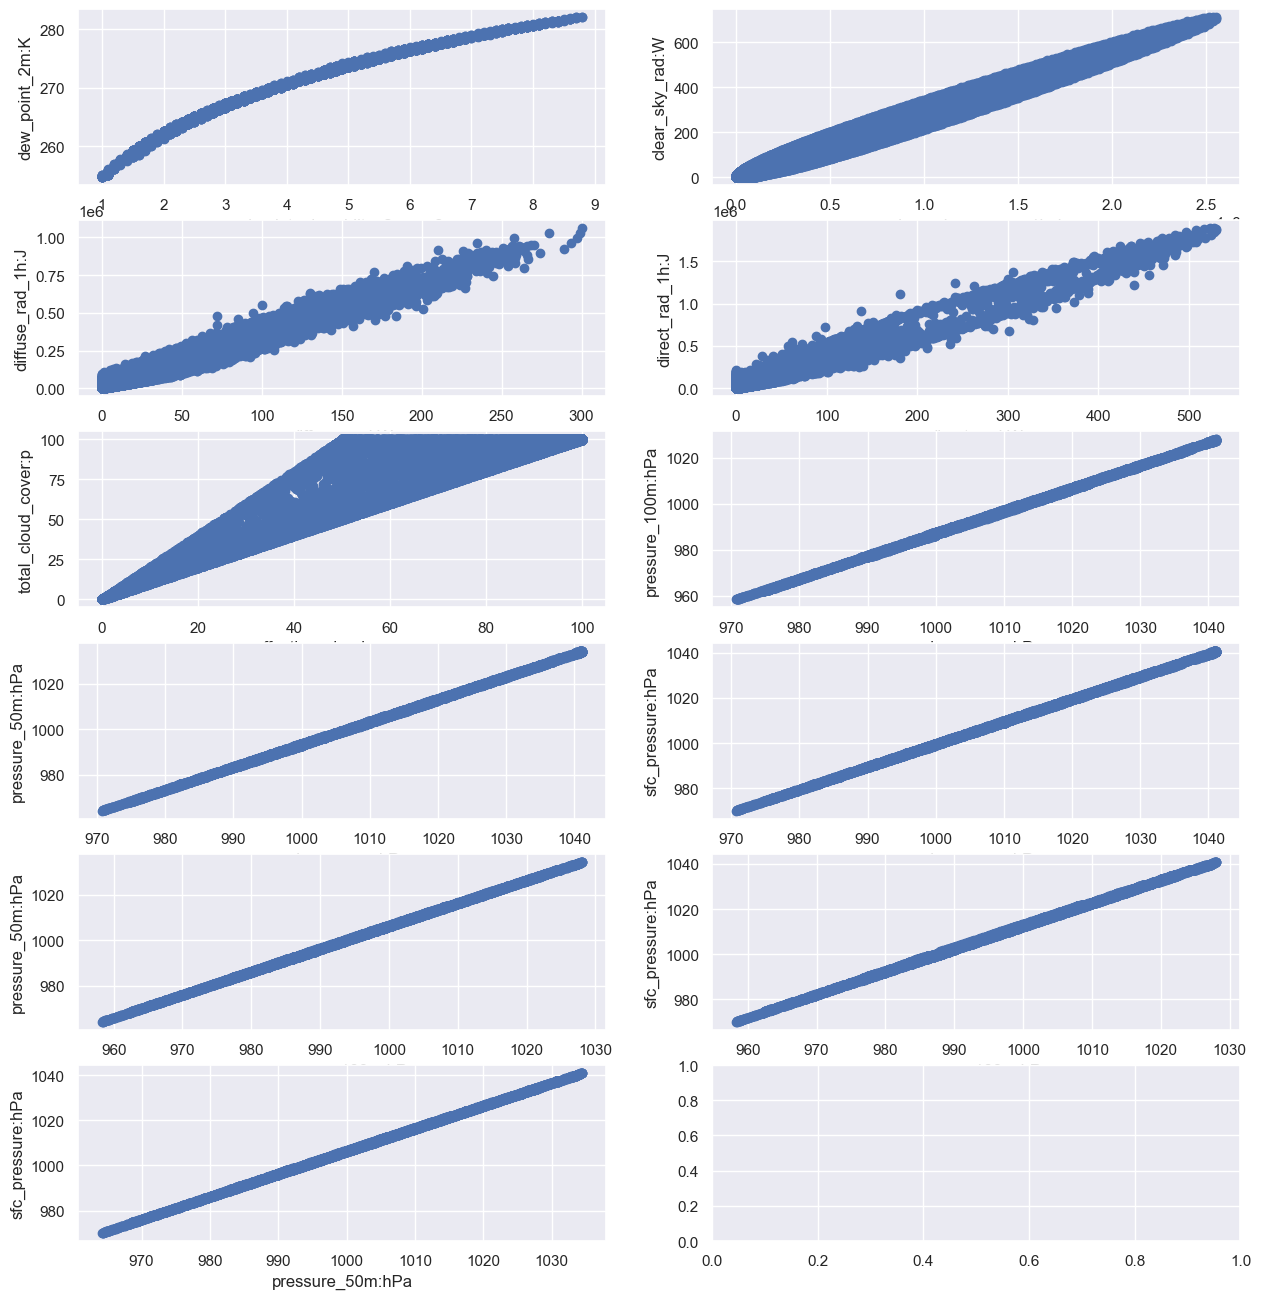

In [30]:
fig, axs = plt.subplots(6,2, figsize=(15,16))
k = 0
for i in range(6):
    for j in range(2):
        if (i != 5 or j!=1):
            axs[i,j].scatter(X_train_estimated_a.loc[:,columns_corr[k][0]],X_train_estimated_a.loc[:,columns_corr[k][1]])
            axs[i,j].set_xlabel(columns_corr[k][0])
            axs[i,j].set_ylabel(columns_corr[k][1])
            k+=1

In [29]:
# because of strong correlation we can drop some columns
columns_to_delete = ['msl_pressure:hPa','pressure_50m:hPa','sfc_pressure:hPa','diffuse_rad_1h:J', 'clear_sky_energy_1h:J']
X_train_observed_a = X_train_observed_a.drop(columns = [columns_to_delete[0],columns_to_delete[1],columns_to_delete[2],columns_to_delete[3],columns_to_delete[4]])
X_train_observed_b = X_train_observed_b.drop(columns = [columns_to_delete[0],columns_to_delete[1],columns_to_delete[2],columns_to_delete[3],columns_to_delete[4]])
X_train_observed_c = X_train_observed_c.drop(columns = [columns_to_delete[0],columns_to_delete[1],columns_to_delete[2],columns_to_delete[3],columns_to_delete[4]])

X_train_estimated_a = X_train_estimated_a.drop(columns = [columns_to_delete[0],columns_to_delete[1],columns_to_delete[2],columns_to_delete[3],columns_to_delete[4]])
X_train_estimated_b = X_train_estimated_b.drop(columns = [columns_to_delete[0],columns_to_delete[1],columns_to_delete[2],columns_to_delete[3],columns_to_delete[4]])
X_train_estimated_c = X_train_estimated_c.drop(columns = [columns_to_delete[0],columns_to_delete[1],columns_to_delete[2],columns_to_delete[3],columns_to_delete[4]])

X_test_estimated_a = X_test_estimated_a.drop(columns = [columns_to_delete[0],columns_to_delete[1],columns_to_delete[2],columns_to_delete[3],columns_to_delete[4]])
X_test_estimated_b = X_test_estimated_b.drop(columns = [columns_to_delete[0],columns_to_delete[1],columns_to_delete[2],columns_to_delete[3],columns_to_delete[4]])
X_test_estimated_c = X_test_estimated_c.drop(columns = [columns_to_delete[0],columns_to_delete[1],columns_to_delete[2],columns_to_delete[3],columns_to_delete[4]])


In [30]:
X_train_observed_a.shape

(118669, 40)

In [31]:
#Check for outliers

In [38]:
X_train_observed_a.columns[1]

'absolute_humidity_2m:gm3'